<a href="https://colab.research.google.com/github/gulaycavusoglu/nn_stock-price-prediction/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Predicting Close price for one day ahead using Neural Network Regression***

---
This script sets up a neural network regression model to analyze Tesla stock price data and predict the next day’s closing price. It preprocesses the data by formatting dates, computing additional features like daily returns, and scaling the 'Close' prices. Using a rolling window approach, it generates time-series features for the model. A TensorFlow/Keras neural network with two hidden layers is trained on the data, evaluated using MSE and MAE metrics, and used to predict future prices. The script also visualizes the predictions alongside actual data to provide insights into the model’s performance.

---



---



# ***Input data for Tesla Close Price Analysis***
---



The input dataset was manually prepared in Excel using the **STOCKHISTORY** function to retrieve Tesla's daily stock prices, covering the period from 04/01/2023 to 26/07/2024. The data consists of 14 columns.

**Key columns:**

* **Date** (trading dates in chronological order),
* **Open, High, Low, Close** (stock prices for each trading day),
* **Volume** (number of shares traded daily),
* **Daily Return** (percentage change in closing prices compared to the previous day)

The stock prices and trading volumes were retrieved using Excel’s STOCKHISTORY function, while additional columns were calculated manually. The dataset was then saved in CSV format, ensuring it is sorted chronologically and includes the necessary columns for analysis.

---



---



# **Stock price prediction workflow**

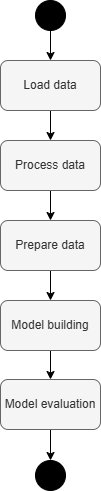

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

df = pd.read_csv('teslastock.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')  # Correct format
df = df.sort_values('Date').reset_index(drop=True)

seed = 411 # to ensure we always get the same results
np.random.seed(seed) # to ensure we always get the same results
tf.keras.utils.set_random_seed(seed) # to ensure we always get the same results
print(df.head())

    Close    Open    High     Low       Date     Volume  Daily return  \
0  113.64  109.11  114.59  107.52 2023-01-04  180388976      5.124884   
1  110.34  110.51  111.75  107.16 2023-01-05  157986324     -2.903907   
2  113.06  103.00  114.39  101.81 2023-01-06  220911051      2.465108   
3  119.77  118.96  123.52  117.11 2023-01-09  190283951      5.934902   
4  118.85  121.07  122.76  114.92 2023-01-10  167642485     -0.768139   

   Mean of daily returns  Daily return daviations  Square of deviations  \
0                   0.24                    -4.88             23.839760   
1                   0.23                     3.13              9.820514   
2                   0.24                    -2.23              4.960646   
3                   0.23                    -5.70             32.521255   
4                   0.22                     0.99              0.971560   

   Varianca of daily returns  Daily votality  Price Movement  Target  
0                  11.551102        3.3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def create_rolling_features(series, window_size=5):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i : i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5

# We'll use only the 'Close' column in this example
close_prices = df['Close'].values.reshape(-1, 1)

# Scale
scaler = StandardScaler()
close_prices_scaled = scaler.fit_transform(close_prices)

# Rolling features
X, y = create_rolling_features(close_prices_scaled.squeeze(), window_size=WINDOW_SIZE)
# X.shape => (#samples, 5), y.shape => (#samples,)

In [ ]:
num_samples = len(X)
train_size = int(0.8 * num_samples)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
def build_regression_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)  # Single output for next-day price
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Include MAE as a metric
    return model

# Create and train the model
model = build_regression_model(input_shape=WINDOW_SIZE)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=16,
    verbose=1
)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Set => MSE loss = {test_loss:.6f}, MAE = {test_mae:.6f}")



Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.3200 - mae: 0.4654 - val_loss: 0.1874 - val_mae: 0.3630
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1045 - mae: 0.2567 - val_loss: 0.0990 - val_mae: 0.2186
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0549 - mae: 0.1832 - val_loss: 0.0917 - val_mae: 0.2056
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0499 - mae: 0.1728 - val_loss: 0.0843 - val_mae: 0.2000
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0459 - mae: 0.1657 - val_loss: 0.0772 - val_mae: 0.1931
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0425 - mae: 0.1589 - val_loss: 0.0695 - val_mae: 0.1853
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0391 - mae: 0.1516 - val_loss: 0.0636 - val_mae: 0.1776
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0369 - mae: 0.1469 - val_loss: 0.0594 - val_mae: 0.1715
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0354 - mae



---


# ***Evaluation***

Loss, MAE, val_loss, and val_mae are used to evaluate the model’s performance during training. Loss shows how well the model fits the training data, while MAE (Mean Absolute Error) measures the average difference between predictions and actual values. val_loss and val_mae check the model’s performance on unseen validation data to ensure it is not overfitting.

The evaluation shows clear improvement as the training progresses. In the first epoch, the model starts with a high error (MSE: 0.2680, MAE: 0.4254), while the validation results are slightly better (val_loss: 0.1643, val_mae: 0.3333). By the middle of the training (Epoch 10), the model performs much better, with loss dropping to 0.0377 and MAE to 0.1507, and validation metrics also improving (val_loss: 0.0558, val_mae: 0.1639). At the last epoch (Epoch 20), the model stabilizes with a low error (MSE: 0.0323, MAE: 0.1390) and strong validation performance (val_loss: 0.0482, val_mae: 0.1557), showing it learned well and works consistently on new data.



---



---



In [ ]:

last_test_sample = X_test[-1].reshape(1, WINDOW_SIZE)
predicted_scaled = model.predict(last_test_sample)
predicted_value = scaler.inverse_transform(predicted_scaled.reshape(-1, 1))[0, 0]
print(f"Predicted Next Day Close (final test sample) = {predicted_value:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Predicted Next Day Close (final test sample) = 219.30


In [ ]:
last_idx = train_size + (len(X_test) - 1)
start_df_idx = last_idx
end_df_idx = last_idx + WINDOW_SIZE

# If the end_df_idx goes beyond df, you might need to adjust,
# but typically your data should have enough rows for that last window.

plot_dates = df['Date'].iloc[start_df_idx : end_df_idx + 1].values
plot_prices = df['Close'].iloc[start_df_idx : end_df_idx + 1].values

# The "future" day is 1 day after the last date in the window
future_date = plot_dates[-1] + pd.Timedelta(days=1)
print(future_date)

2024-07-26 00:00:00


In [ ]:
print("plot_dates:", plot_dates)
print("plot_dates[-1]:", plot_dates[-1])

plot_dates: ['2024-07-18T00:00:00.000000000' '2024-07-19T00:00:00.000000000'
 '2024-07-22T00:00:00.000000000' '2024-07-23T00:00:00.000000000'
 '2024-07-24T00:00:00.000000000' '2024-07-25T00:00:00.000000000']
plot_dates[-1]: 2024-07-25T00:00:00.000000000


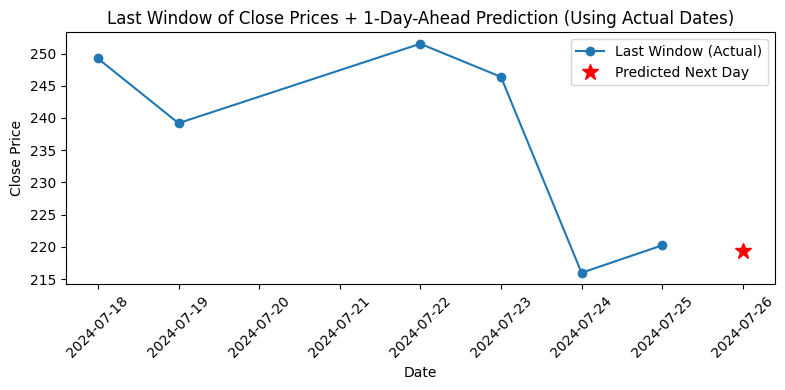


Predicted Next Day: 2024-07-26 | Predicted Close = 219.30


In [ ]:
plt.figure(figsize=(8,4))
plt.plot(plot_dates, plot_prices, marker='o', label="Last Window (Actual)")

plt.plot(future_date, predicted_value, 'r*', markersize=12, label="Predicted Next Day")

plt.title("Last Window of Close Prices + 1-Day-Ahead Prediction (Using Actual Dates)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



print(f"\nPredicted Next Day: {future_date.date()} | Predicted Close = {predicted_value:.2f}")



---


# ***Strengths of the Implementation***

The implementation shows good results, with both training and validation errors improving over time. This means the model is learning well and can work on unseen data. Using both training and validation metrics (loss and MAE) helps monitor the model and avoid overfitting. The rolling window method for feature creation is a great choice for time-series data like stock prices.

# ***Limitations of the Implementation***
The implementation has some limitations. The neural network is simple, with only two hidden layers, so it might not capture very complex patterns in the data. The model also depends on the size of the training data; if there isn’t enough data, it might not perform well.



---


---



